# Titanic: Machine Learning from Disaster

We will try to compete in this competition by using Random Forest Machine Learning <a href= https://www.kaggle.com/c/titanic/>[1]</a>. The score currently is <b>0.76</b> slightly increasing from the previous submission (0.74). 

Thanks for this karnel for nice explanation <a href= https://www.kaggle.com/startupsci/titanic-data-science-solutions>[2]</a>. 

## What is Random Forests Machine Learning? 

 <img src="random_forest.jpg" alt="Random Forest" style="width:650px;height:400px;"> 
 
 The diagram above explains how random forest method work <a href= https://i.stack.imgur.com/eL7wc.jpg>[2]</a>.

## Importing the Library

In [1]:
# data analysis
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# machine learning
from sklearn.ensemble import RandomForestClassifier

# some function

def unique(data):
    """
    unique data
    data = data frame
    """
    return data.describe(include=['O'])

def unique_col(data,column):
    """
    unique data based on the column
    data = data frame
    column (str) = name of the column
    """
    return data[column].describe(include=['0'])

def remove_duplicates(data,column):
    """
    Removing duplicates
    data = data frame
    column = strings of column you want to remove the duplicates
    """
    data.sort_values(column, inplace = True)
    data.drop_duplicates(subset =column, keep = False, inplace = True) 
    return data

def check_null(data):
    """
    checking null values
    data = data frame
    """
    null_columns = data.columns[data.isnull().any()]
    return data[null_columns].isnull().sum()    

def display_null(data,column):
    """
    data: data frame
    column: column name in str
    """
    bool_series = pd.isnull(data[column])
    return data[bool_series]

def display_not_null(data,column):
    """
    data: data frame
    column: column name in str
    """
    bool_series = pd.notnull(data[column])  
    return data[bool_series]  

def column_is_null(data,column):
    """
    data: data frame
    column: column name in str
    """
    for header in data.columns:
        if header == column:
            sum_of_null = data[column].isna().sum()
            column_null = f"Null values for '{header}': {sum_of_null}"
    print(column_null) 


## Acquiring the Data

In [2]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
combine = [train_df, test_df]

## Analyzing the Data

In [3]:
print(train_df.columns.values)
print("-"*80)
print(test_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
--------------------------------------------------------------------------------
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Variable Notes
Survived: Survival of the person
<ul>
  <li>0 = No </li>
  <li>1 = Yes</li>
</ul> 

Pclass: A proxy for socio-economic status (SES)
<ul>
  <li>1st = Upper </li>
  <li>2nd = Middle</li>
  <li>3rd = Lower</li>
</ul> 

Sex: Sex (male, female)

Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

SibSp: The dataset defines family relations in this way...
<ul>
  <li>Sibling = brother, sister, stepbrother, stepsister </li>
  <li>Spouse = husband, wife (mistresses and fiancés were ignored)</li>
</ul> 


Parch: The dataset defines family relations in this way...
<ul>
  <li>Parent = mother, father </li>
  <li>Child = daughter, son, stepdaughter, stepson</li>
  <li>Some children travelled only with a nanny, therefore parch=0 for them.</li>
</ul> 

Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Ticket: name of the ticket
Fare: passenger fare
Cabin: Cabin number
Embarked: Port of embarkation

### Data set explanation
<ul>
  <li>The categorical features: Survived, Sex, and Embarked. </li>
  <li>The numerical features: Age and Fare</li>
  <li>Mix data types: Ticket and Cabin</li>
</ul> 


#### Checking Null Values

In [5]:
print(check_null(train_df),'train_df')
print('-'*25)
print(check_null(train_df),'test_df')
    

Age         177
Cabin       687
Embarked      2
dtype: int64 train_df
-------------------------
Age         177
Cabin       687
Embarked      2
dtype: int64 test_df


<ul>
  <li>The columns that has Null values: Age, Cabin, and Embarks </li>
</ul> 

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The survived rate is around 38 % from this data (taking from the mean)

#### Distribution of categorical features

In [7]:
unique(train_df)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Wilhelms, Mr. Charles",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


#### Quick analyzing  for survival rate
this is only for data frame that has non Null values. We can see that female has higher survival rate compare to male, and Pclass 1 has the highest survival rate.

,Sex,Survived
0,female,0.742038
1,male,0.188908


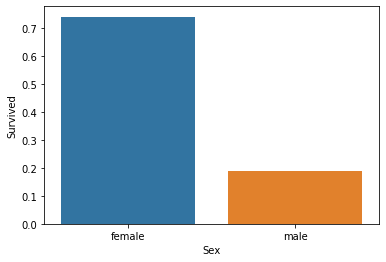

In [8]:
sex_survived = train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False)\
.mean().sort_values(by='Survived', ascending=False)

sns.barplot(x='Sex', y='Survived', data=sex_survived)
sex_survived

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


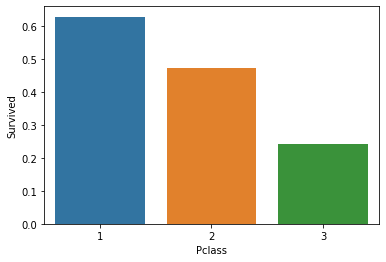

In [9]:
pclass_survived = train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False)\
.mean().sort_values(by='Survived', ascending=False)

sns.barplot(x='Pclass', y='Survived', data=pclass_survived)
pclass_survived

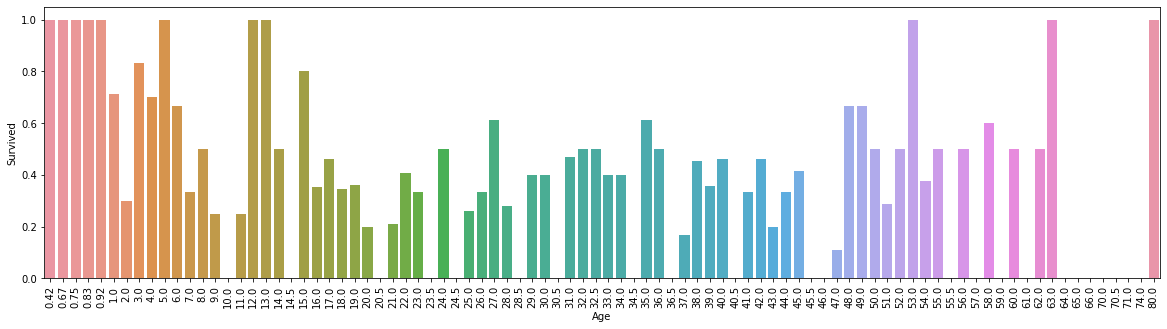

In [10]:
age_survived = train_df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
fig = plt.figure(figsize=(20,5))
sns.barplot(x='Age', y='Survived', data=age_survived)
plt.xticks(rotation=90)
plt.show()

## Cleaning the Data

### Converting a categorical feature

Converting sex to numeric

In [11]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

Filling missing values for embarked

In [12]:
# Correlation of fare and embarked
train_df[["Embarked", "Fare"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Fare', ascending=False)

,Embarked,Fare
0,C,59.954144
2,S,27.079812
1,Q,13.276030


In [13]:
display_null(train_df, 'Embarked')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


We can see that the null values have fare 80.0, which mean that they embarked from port 'C'. Hence, we replace the null values with 'C'.

### Completing the Null values of Embarked

In [14]:
# Replacing the null values of embarked with 'C'
train_df.loc[train_df['Embarked'].isnull(),'Embarked'] = 'C'

In [15]:
# Checking if the null values in embarked already replaced
column_is_null(train_df,'Embarked')

Null values for 'Embarked': 0


S    644
C    170
Q     77
Name: Embarked, dtype: int64

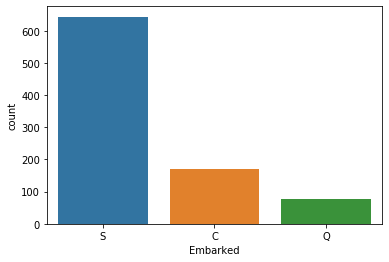

In [16]:
sns.countplot(x='Embarked', data=train_df)
train_df['Embarked'].value_counts()

In [17]:
# Lets asign the Embarked with numeral C = 0, S=1, Q=2
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'C': 0, 'S': 1, 'Q':2} ).astype(int)

In [18]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1


# Age

### Completing the Null values 
We fill the null values by using random number in range of: $$ \bar{x} \pm \Delta x \, ,$$
where $\bar{x}$ is mean of data, and $\Delta x$ is standard deviation (std).


In [19]:
# Checking the sum of null values in train_df and test_df
column_is_null(train_df,'Age')
column_is_null(test_df,'Age')

Null values for 'Age': 177
Null values for 'Age': 86


In [20]:
#Generate 177 and 86 random numbers in the range of mean +- std
mean_value = train_df['Age'].mean()
std_value = train_df['Age'].std()
low_range = round(mean_value - std_value)
high_range = round(mean_value + std_value)
randomlist = rnd.sample(range(low_range, high_range),25)*8

#Slicing the list, so we can have equal shape to the sum of null values                        
train_randomlist = randomlist[0:177]
test_randomlist = randomlist[0:86]

In [21]:
# Adding 0.5, this is a condition to fill the null values of age with xx.05
train_array = 0.5 + np.array(train_randomlist)
train_df.loc[train_df['Age'].isnull(), 'Age'] = train_array

In [22]:
# Checking null values of train_df 'Age'
column_is_null(train_df,'Age')

Null values for 'Age': 0


In [23]:
test_array = 0.5 + np.array(test_randomlist)
test_df.loc[test_df['Age'].isnull(), 'Age'] = test_array

In [24]:
# Checking null values of test_df 'Age'
column_is_null(test_df,'Age')

Null values for 'Age': 0


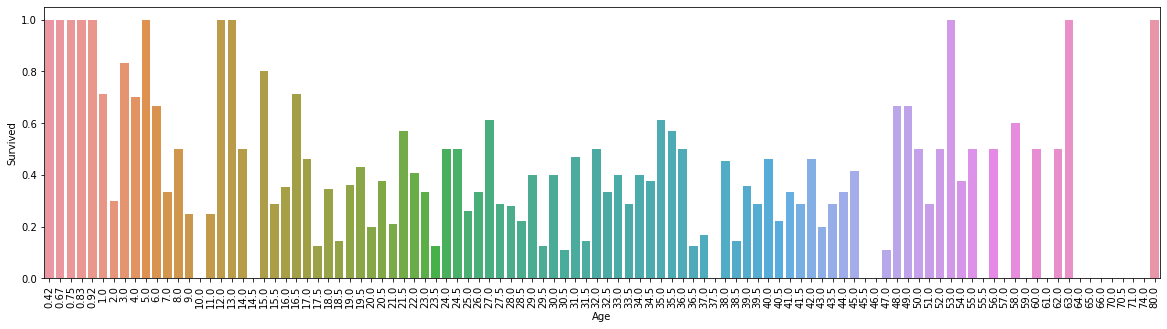

In [25]:
# Ploting after replacing the null values
age_survived = train_df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
fig = plt.figure(figsize=(20,5))
sns.barplot(x='Age', y='Survived', data=age_survived)
plt.xticks(rotation=90)
plt.show()

In [26]:
# We clasified the age based on the graph above
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 50), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 63), 'Age'] = 4
    dataset.loc[dataset['Age'] > 63, 'Age'] = 5

In [27]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,3.0,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",0,4.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2.0,1,1,3101298,12.2875,NaN,1


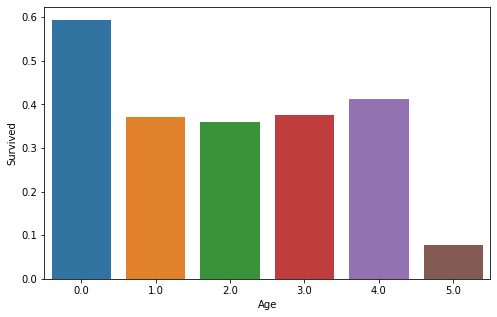

In [28]:
age_survived = train_df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
fig = plt.figure(figsize=(8,5))
sns.barplot(x='Age', y='Survived', data=age_survived)
plt.show()

 <b>Let's just make more simple data frame</b> 

In [29]:
train_df = train_df.drop(['PassengerId','Name','Ticket','Fare', 'Cabin'], axis=1)
test_df = test_df.drop(['Name','Ticket', 'Cabin', 'Fare'], axis=1)
combine = [train_df, test_df]

In [30]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,2.0,1,0,1
1,1,1,1,3.0,1,0,0
2,1,3,1,2.0,0,0,1
3,1,1,1,3.0,1,0,1
4,0,3,0,3.0,0,0,1


## Model and Predict

In [31]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [32]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.09

In [33]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv('submission.csv', index=False)

We submit the model to Kaggle and obtained the score <b>0.74</b>. The result is not to bad (because we ignore most of the data), but we will try to increase the model accuracy next time.

## Reference:
[1] https://www.kaggle.com/c/titanic/ <br>
[2] https://www.kaggle.com/startupsci/titanic-data-science-solutions<br>
[3] https://i.stack.imgur.com/eL7wc.jpg 